In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import load_model
import tensorflow as tf
from sklearn import metrics
from keras.optimizers import SGD

import os, sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

In [2]:
datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

train_path = os.path.join(os.pardir, os.pardir, 'data/train')
final_test_path = os.path.join(os.pardir, os.pardir, 'data/val')
test_path = os.path.join(os.pardir, os.pardir, 'data/test')

In [9]:
image_size = 224
batch_size = 32

train_generator160 = datagen.flow_from_directory(
                train_path,  # Source directory for the training images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode='binary',
                shuffle=False)

test_generator160 = datagen.flow_from_directory(
                test_path,  # Source directory for the training images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode='binary',
                shuffle=False)

Found 4986 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [10]:
model = load_model('bigdatamodel.h5')

W0416 13:53:59.335447 4637273536 hdf5_format.py:258] Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.


In [5]:
explainer = lime_image.LimeImageExplainer()

In [11]:
explanation = explainer.explain_instance(test_generator160[0][0][0], 
                                         model.predict,
                                         hide_color=0,
                                         num_samples=1000)

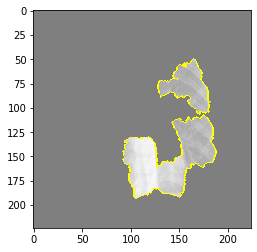

In [13]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=True, 
                                            num_features=5, 
                                            hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

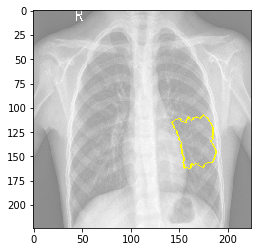

In [27]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=True, 
                                            num_features=1, 
                                            hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))



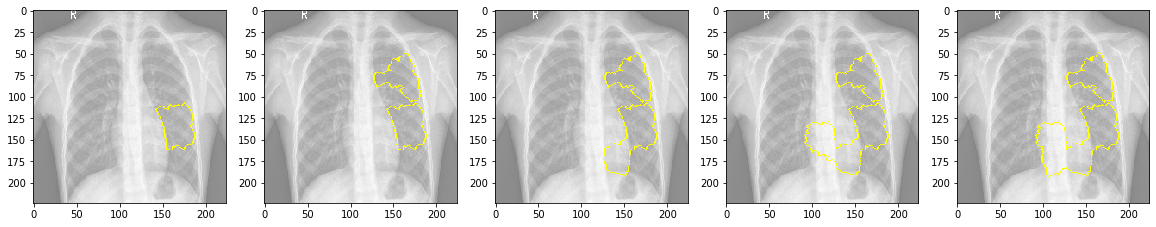

In [41]:
fig, axes = plt.subplots(ncols=5, figsize=(20,30))

for feats in range(5):
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], 
                                            positive_only=True, 
                                            num_features=feats+1, 
                                            hide_rest=False)
    axes[feats].imshow(mark_boundaries(temp / 2 + 0.5, mask))